In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev as T

%matplotlib inline

## Adapted from 
https://github.com/cantaro86/Financial-Models-Numerical-Methods/tree/master

In [21]:
N = 4      # number of time steps
r = 0.06   # interest rate
K = 1.1    # strike
T = 3      # Maturity

dt = T / (N - 1)  # time interval
df = np.exp(-r * dt)  # discount factor per time interval

In [43]:
S0 = 100.0  # spot stock price
K = 100.0  # strike
T = 1.0  # maturity
r = 0.1  # risk free rate
sigma = 0.2  # diffusion coefficient or volatility
dt = T / (N - 1)  # time interval
df = np.exp(-r * dt)  # discount factor per time time interval

paths=10
order=2

X0 = np.zeros((paths, 1))
    
increments = stats.norm.rvs(
    loc=(r - sigma**2 / 2) * dt,
    scale=np.sqrt(dt) * sigma,
    size=(paths, N - 1),
)
    
X = np.concatenate((X0, increments), axis=1).cumsum(1)
S = S0 * np.exp(X)

H = np.maximum(K - S, 0)  # intrinsic values for put option
V = np.zeros_like(H)  # value matrix
V[:, -1] = H[:, -1]

# Valuation by LS Method
for t in range(N - 2, 0, -1):
    good_paths = H[:, t] > 0
    rg = np.polyfit(S[good_paths, t], V[good_paths, t + 1] * df, 2)  # polynomial regression
    C = np.polyval(rg, S[good_paths, t])  # evaluation of regression

    exercise = np.zeros(len(good_paths), dtype=bool)
    exercise[good_paths] = H[good_paths, t] > C

    V[exercise, t] = H[exercise, t]
    V[exercise, t+1:] = 0
    discount_path = V[:, t] == 0
    V[discount_path, t] = V[discount_path, t + 1] * df

V0 = np.mean(V[:, 1]) * df

In [36]:
V0

4.0456985370732275

In [13]:
dt

0.3333333333333333

In [19]:
np.linspace(0.0, 1.0, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [44]:
df = pd.DataFrame(S)

In [45]:
df

,0,1,2,3
0,100.0,94.162801,116.101507,107.060623
1,100.0,117.164043,109.690223,123.079797
2,100.0,108.009282,99.297682,93.146337
3,100.0,94.512925,103.204072,88.018957
4,100.0,101.257078,95.868981,118.970588
5,100.0,88.377233,93.952810,98.023307
6,100.0,120.340753,138.144819,118.038850
7,100.0,124.523464,121.615187,131.333393
8,100.0,77.579533,94.094068,97.218286
9,100.0,103.500438,100.726022,118.366919


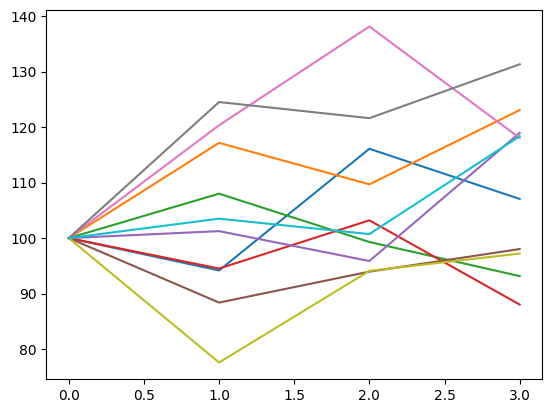

In [46]:
df.T.plot(legend=False)
plt.show()

https://numpy.org/doc/stable/reference/routines.polynomials.classes.html

In [ ]:
plt.plot(np.linspace(0.0, 1.0, 4), S[:,0])

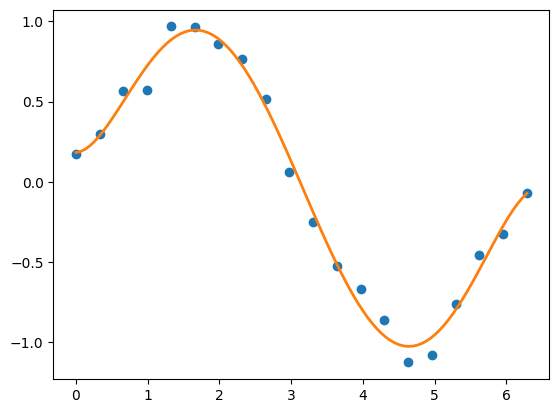

In [5]:
np.random.seed(11)
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x) + np.random.normal(scale=.1, size=x.shape)
p = T.fit(x, y, 5)
plt.plot(x, y, 'o')
xx, yy = p.linspace()
plt.plot(xx, yy, lw=2)
p.domain
p.window
plt.show()